In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

MAIN_PATH = 'C:/Users/User/Downloads/'
df = pd.read_csv(MAIN_PATH +'khs_data_20181205.csv')
original_df = df.copy()

# Have a grasp of how our data looks.
df.head()

,ClientNum,yyyymm,bankrupcytrate,finance_score,nonfin_score,finance_grade,nonfin_grade,final_credit_score,final_credit_grade,class_result
0,819975126,201712,100.0,20.76517,0.99946,19.0,20.0,0.0,23,1
1,400133939,201712,100.0,20.58430,14.68817,17.0,19.0,0.0,23,1
2,753036928,201712,100.0,28.96412,7.51639,17.0,20.0,0.0,22,1
3,822552163,201712,100.0,31.57935,16.66230,14.0,19.0,0.0,22,1
4,707775379,201712,100.0,18.33327,3.68292,19.0,20.0,0.0,23,1


In [7]:
df.describe()

,ClientNum,yyyymm,bankrupcytrate,finance_score,nonfin_score,finance_grade,nonfin_grade,final_credit_score,final_credit_grade,class_result
count,5.051600e+04,50516.0,50516.000000,50516.000000,50516.000000,49891.000000,49891.000000,50516.000000,50516.000000,50516.000000
mean,7.005465e+08,201712.0,2.913036,50.201195,55.936316,9.134754,7.755246,53.128512,8.387501,0.020251
std,1.341582e+08,0.0,5.373573,14.805311,14.091928,3.801960,3.236952,12.258762,3.324079,0.140859
min,4.000000e+08,201712.0,0.030000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,6.047907e+08,201712.0,0.840000,41.493325,48.346150,6.000000,6.000000,46.055625,6.000000,0.000000
50%,7.393906e+08,201712.0,1.420000,50.732170,57.216410,9.000000,7.000000,53.685815,8.000000,0.000000
75%,8.188123e+08,201712.0,2.280000,59.611787,65.021595,11.000000,9.000000,60.946142,10.000000,0.000000
max,8.750245e+08,201712.0,100.000000,98.000260,98.866710,20.000000,20.000000,100.000000,23.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50516 entries, 0 to 50515
Data columns (total 10 columns):
ClientNum             50516 non-null int64
yyyymm                50516 non-null int64
bankrupcytrate        50516 non-null float64
finance_score         50516 non-null float64
nonfin_score          50516 non-null float64
finance_grade         49891 non-null float64
nonfin_grade          49891 non-null float64
final_credit_score    50516 non-null float64
final_credit_grade    50516 non-null int64
class_result          50516 non-null int64
dtypes: float64(6), int64(4)
memory usage: 3.9 MB


In [9]:
# Null 값은 0으로 치환
df = df.fillna(0)

In [10]:
df.describe()

,ClientNum,yyyymm,bankrupcytrate,finance_score,nonfin_score,finance_grade,nonfin_grade,final_credit_score,final_credit_grade,class_result
count,5.051600e+04,50516.0,50516.000000,50516.000000,50516.000000,50516.000000,50516.000000,50516.000000,50516.000000,50516.000000
mean,7.005465e+08,201712.0,2.913036,50.201195,55.936316,9.021736,7.659296,53.128512,8.387501,0.020251
std,1.341582e+08,0.0,5.373573,14.805311,14.091928,3.910971,3.329136,12.258762,3.324079,0.140859
min,4.000000e+08,201712.0,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.047907e+08,201712.0,0.840000,41.493325,48.346150,6.000000,6.000000,46.055625,6.000000,0.000000
50%,7.393906e+08,201712.0,1.420000,50.732170,57.216410,8.000000,7.000000,53.685815,8.000000,0.000000
75%,8.188123e+08,201712.0,2.280000,59.611787,65.021595,11.000000,9.000000,60.946142,10.000000,0.000000
max,8.750245e+08,201712.0,100.000000,98.000260,98.866710,20.000000,20.000000,100.000000,23.000000,1.000000


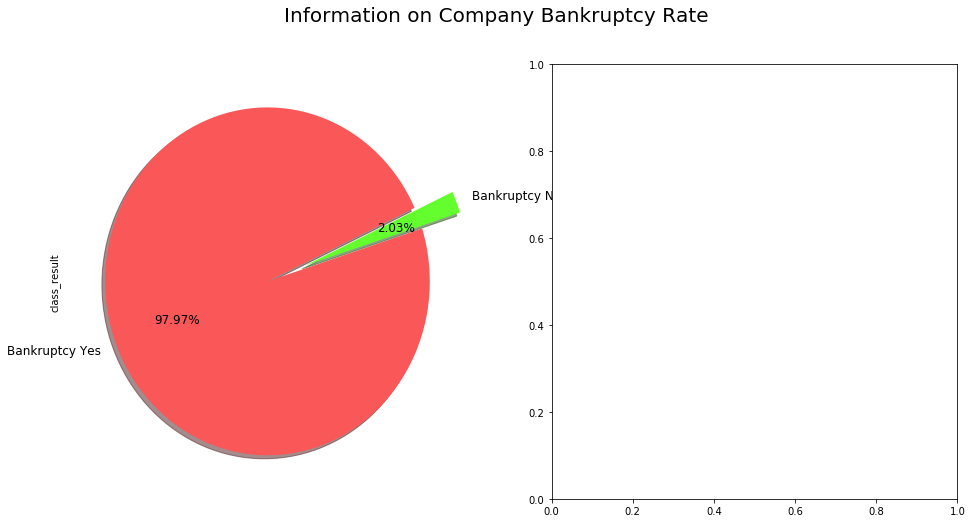

In [11]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Bankruptcy Yes", "Bankruptcy No"

plt.suptitle('Information on Company Bankruptcy Rate', fontsize=20)

df["class_result"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

plt.show()

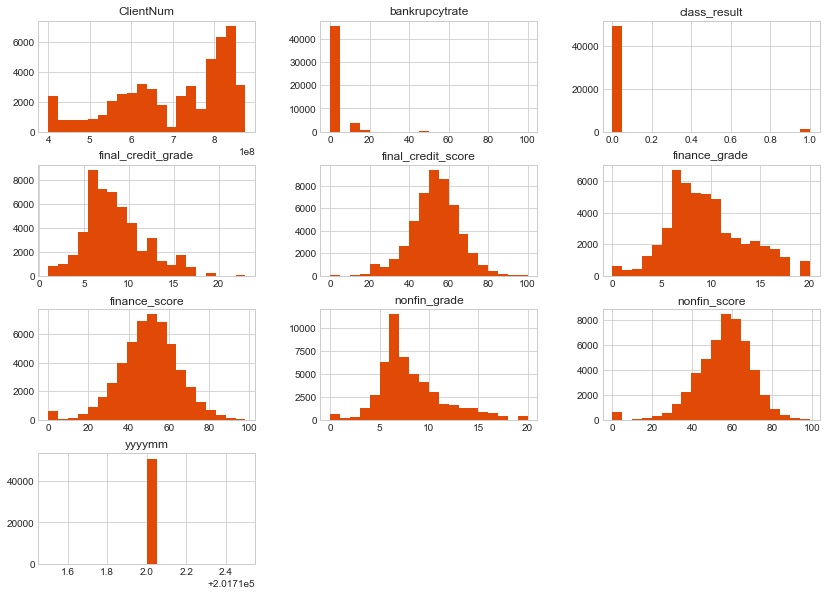

In [12]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [13]:
# 의미 없는 변수인 client number와 결산년월(yyyymm)은 삭제한다

df.drop(['ClientNum', 'yyyymm'], axis=1, inplace=True)

In [14]:

df.head()

,bankrupcytrate,finance_score,nonfin_score,finance_grade,nonfin_grade,final_credit_score,final_credit_grade,class_result
0,100.0,20.76517,0.99946,19.0,20.0,0.0,23,1
1,100.0,20.58430,14.68817,17.0,19.0,0.0,23,1
2,100.0,28.96412,7.51639,17.0,20.0,0.0,22,1
3,100.0,31.57935,16.66230,14.0,19.0,0.0,22,1
4,100.0,18.33327,3.68292,19.0,20.0,0.0,23,1


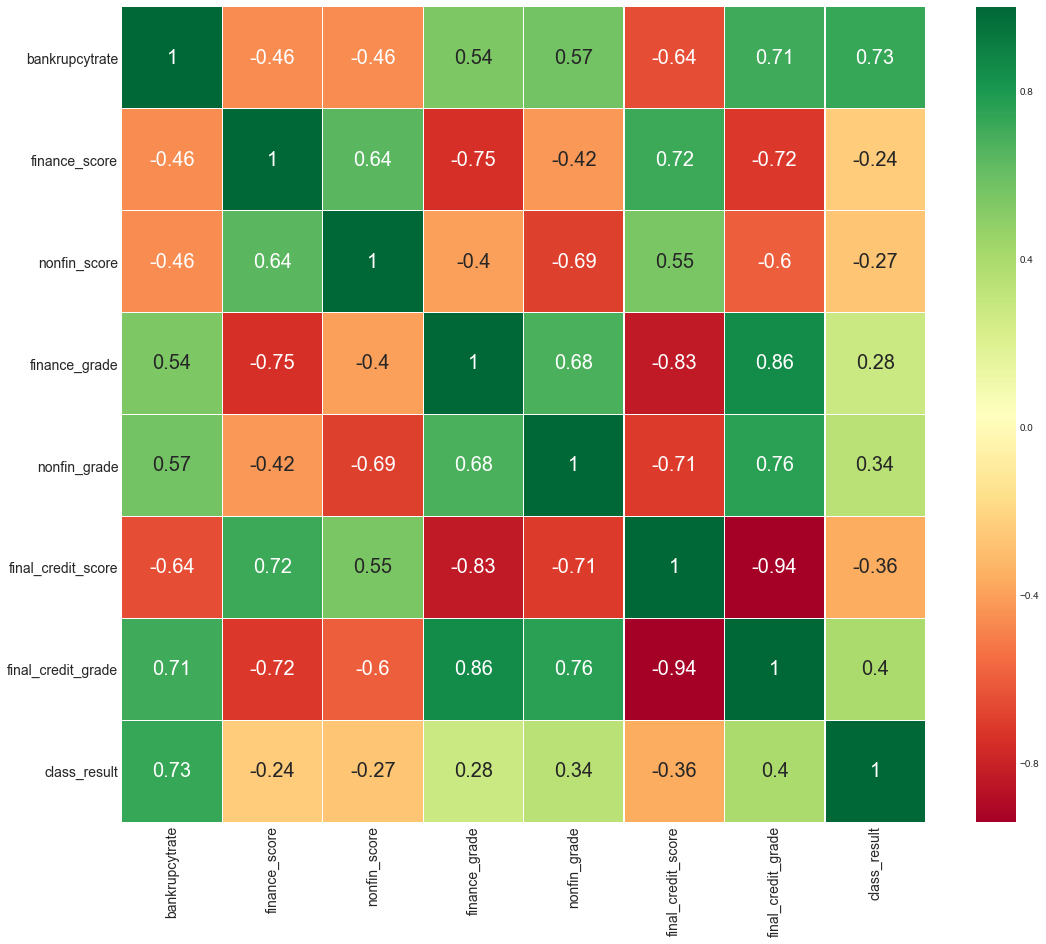

In [15]:
# 전체 변수 correlation 분석
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

nc = MinMaxScaler()

## 모델 트레이닝 및 테스트를 위해 숫자 정보를 normalization 처리한다.
sv_bankrupcytrate = nc.fit_transform(df['bankrupcytrate'].values.reshape(-1,1))
sv_finance_score = nc.fit_transform(df['finance_score'].values.reshape(-1,1))
sv_nonfin_score = nc.fit_transform(df['nonfin_score'].values.reshape(-1,1))
sv_finance_grade = nc.fit_transform(df['finance_grade'].values.reshape(-1,1))
sv_nonfin_grade = nc.fit_transform(df['nonfin_grade'].values.reshape(-1,1))
sv_final_credit_score = nc.fit_transform(df['final_credit_score'].values.reshape(-1,1))
sv_final_credit_grade = nc.fit_transform(df['final_credit_grade'].values.reshape(-1,1))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [24]:
print(sv_bankrupcytrate,sv_finance_score,sv_nonfin_score,sv_finance_grade,sv_nonfin_grade,sv_final_credit_score,sv_final_credit_grade)

[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]] [[ 0.21188893]
 [ 0.21004332]
 [ 0.29555146]
 ..., 
 [ 0.88461959]
 [ 0.78266323]
 [ 0.        ]] [[ 0.01010917]
 [ 0.14856538]
 [ 0.07602549]
 ..., 
 [ 0.89126016]
 [ 0.65195524]
 [ 0.        ]] [[ 0.95]
 [ 0.85]
 [ 0.85]
 ..., 
 [ 0.05]
 [ 0.05]
 [ 0.  ]] [[ 1.  ]
 [ 0.95]
 [ 1.  ]
 ..., 
 [ 0.05]
 [ 0.15]
 [ 0.  ]] [[ 0.       ]
 [ 0.       ]
 [ 0.       ]
 ..., 
 [ 0.870863 ]
 [ 0.7226407]
 [ 0.938    ]] [[ 1.        ]
 [ 1.        ]
 [ 0.95454545]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


In [26]:
df['bankrupcytrate'] = sv_bankrupcytrate
df['finance_score'] = sv_finance_score
df['nonfin_score'] = sv_nonfin_score
df['finance_grade'] = sv_finance_grade
df['nonfin_grade'] = sv_nonfin_grade
df['final_credit_score'] = sv_final_credit_score
df['final_credit_grade'] = sv_final_credit_grade

In [27]:
df.head()

,bankrupcytrate,finance_score,nonfin_score,finance_grade,nonfin_grade,final_credit_score,final_credit_grade,class_result
0,1.0,0.211889,0.010109,0.95,1.00,0.0,1.000000,1
1,1.0,0.210043,0.148565,0.85,0.95,0.0,1.000000,1
2,1.0,0.295551,0.076025,0.85,1.00,0.0,0.954545,1
3,1.0,0.322237,0.168533,0.70,0.95,0.0,0.954545,1
4,1.0,0.187074,0.037251,0.95,1.00,0.0,1.000000,1


In [28]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)
from sklearn.dummy import DummyClassifier
## 별도의 알고리즘 적용하지 않았을 경우의 성능을 먼저 예측한다.
du = DummyClassifier()

In [30]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(DummyClassifier(),param_grid={'strategy':['stratified','most_frequent','prior','uniform']})
gcv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DummyClassifier(constant=None, random_state=None, strategy='stratified'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'strategy': ['stratified', 'most_frequent', 'prior', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
# 성능의 기준값은 98.02로 잡는다.
gcv.best_score_

0.98023245948926785

In [33]:
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier(n_estimators=5, random_state=42)
par = {'n_estimators': [50, 100, 150, 10],'random_state':[100,200,300],'max_depth':[x for x in range(3,10)]}
gcv = GridSearchCV(estimator=Rforest, param_grid=par, cv=3, n_jobs=-1)

In [34]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 10], 'random_state': [100, 200, 300], 'max_depth': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
gcv.best_params_

{'max_depth': 3, 'n_estimators': 50, 'random_state': 100}

In [36]:
Rforest = RandomForestClassifier(n_estimators=50, random_state=100, max_depth=3)
Rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [37]:
# Overfitting이 되어버렸음
Rforest.score(X_train, y_train)

1.0

In [38]:
## 주요 성능 측정값을 구해보자
from sklearn.metrics import classification_report
a = classification_report(y_test,Rforest.predict(X_test),digits=7)

In [39]:
print(a)

             precision    recall  f1-score   support

          0  1.0000000 1.0000000 1.0000000     14831
          1  1.0000000 1.0000000 1.0000000       324

avg / total  1.0000000 1.0000000 1.0000000     15155



In [40]:
# 상관관계가 매우 높은 feature로 인해, 트레이닝, 테스트 모두 score가 100 으로 되어 버림
Rforest.score(X_test, y_test)

1.0

In [42]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
gn = GaussianNB(priors=None)

In [44]:
gn.fit(X_train, y_train)

GaussianNB(priors=None)

In [45]:
gn.score(X_train, y_train)

0.94341223381691697

In [49]:
gn.score(X_test, y_test)

0.94133949191685917

In [50]:
a = classification_report(y_test,gn.predict(X_test),digits=7)

In [51]:
print(a)

             precision    recall  f1-score   support

          0  1.0000000 0.9400580 0.9691030     14831
          1  0.2671063 1.0000000 0.4216005       324

avg / total  0.9843314 0.9413395 0.9573979     15155



In [52]:
dt = DecisionTreeClassifier()

In [55]:
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [56]:
# DT도 overfitting
dt.score(X_test, y_test)

1.0

In [57]:
a = classification_report(y_test,dt.predict(X_test),digits=7)

In [58]:
print(a)

             precision    recall  f1-score   support

          0  1.0000000 1.0000000 1.0000000     14831
          1  1.0000000 1.0000000 1.0000000       324

avg / total  1.0000000 1.0000000 1.0000000     15155



In [59]:
lr = LogisticRegression()

In [60]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.99833149515002406

In [61]:
lr.score(X_test, y_test)

0.99795447047179153

In [64]:
a = classification_report(y_test,lr.predict(X_test),digits=7)

In [65]:
print(a)

             precision    recall  f1-score   support

          0  0.9979141 1.0000000 0.9989560     14831
          1  1.0000000 0.9043210 0.9497569       324

avg / total  0.9979587 0.9979545 0.9979042     15155

